--- Simulating a Stationary State ---
Initial state is |0>, which is an eigenstate of the Pauli-Z Hamiltonian.

Probabilities of measuring |0> and |1> over time:
Time Step 1: P(|0>) = 1.0000, P(|1>) = 0.0000
Time Step 2: P(|0>) = 1.0000, P(|1>) = 0.0000
Time Step 3: P(|0>) = 1.0000, P(|1>) = 0.0000
Time Step 4: P(|0>) = 1.0000, P(|1>) = 0.0000
Time Step 5: P(|0>) = 1.0000, P(|1>) = 0.0000
Time Step 6: P(|0>) = 1.0000, P(|1>) = 0.0000
Time Step 7: P(|0>) = 1.0000, P(|1>) = 0.0000
Time Step 8: P(|0>) = 1.0000, P(|1>) = 0.0000
Time Step 9: P(|0>) = 1.0000, P(|1>) = 0.0000
Time Step 10: P(|0>) = 1.0000, P(|1>) = 0.0000


--- Simulating a Non-Stationary State ---
Initial state is |+>, a superposition of |0> and |1>.
Simulating for 10 steps with t = 0.5...

Probabilities of measuring |0> and |1> over time (Oscillations expected):
Time Step 1: P(|0>) = 0.7702, P(|1>) = 0.2298
Time Step 2: P(|0>) = 0.2919, P(|1>) = 0.7081
Time Step 3: P(|0>) = 0.0050, P(|1>) = 0.9950
Time Step 4: P(|0>) = 0.17

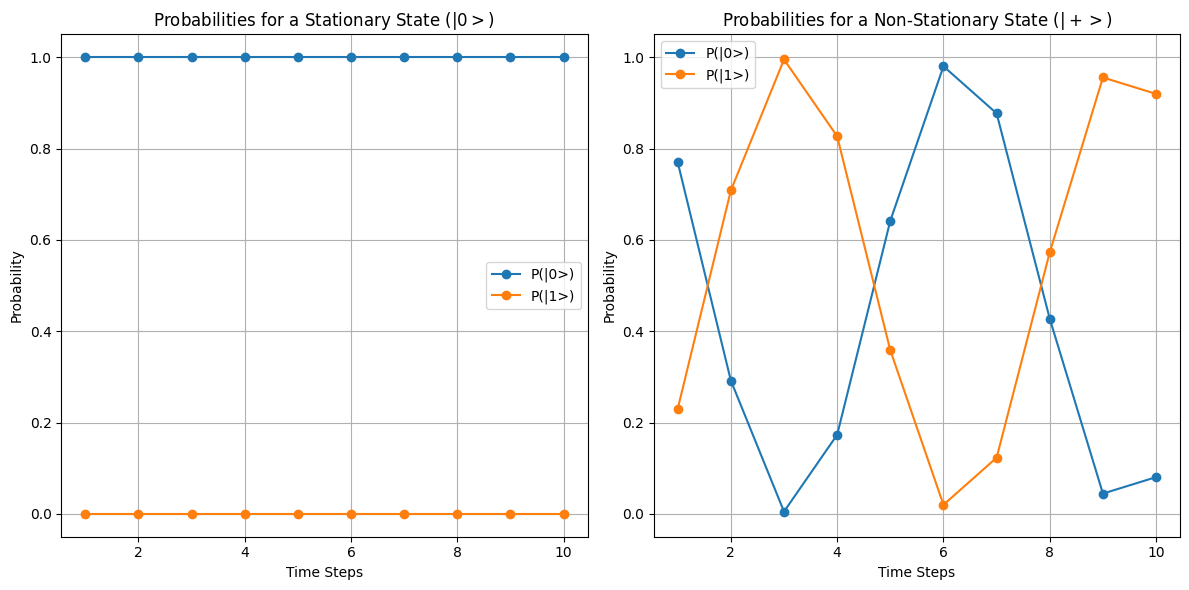


--- Project Complete ---


In [2]:
# Import necessary libraries from Qiskit and other modules
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
import numpy as np
import matplotlib.pyplot as plt

# --- Part 1: Simulating a Stationary State  ---
print("--- Simulating a Stationary State ---")
print("Initial state is |0>, which is an eigenstate of the Pauli-Z Hamiltonian.")
simulator = AerSimulator()
time_step = 0.5
num_steps = 10
state_vectors_stationary = []
qc_stationary_base = QuantumCircuit(1)
for _ in range(num_steps):
    qc_stationary = qc_stationary_base.copy()
    qc_stationary.rz(2 * time_step, 0)
    qc_stationary.save_statevector()
    job = simulator.run(qc_stationary)
    result = job.result()
    statevector = result.get_statevector()
    prob_0 = np.abs(statevector[0])**2
    prob_1 = np.abs(statevector[1])**2
    state_vectors_stationary.append((prob_0, prob_1))
    qc_stationary_base.rz(2 * time_step, 0) # Apply the gate for the next step
print("\nProbabilities of measuring |0> and |1> over time:")
for i, (p0, p1) in enumerate(state_vectors_stationary):
    print(f"Time Step {i+1}: P(|0>) = {p0:.4f}, P(|1>) = {p1:.4f}")

# --- Part 2: Simulating a Non-Stationary State to show oscillations ---
print("\n\n--- Simulating a Non-Stationary State ---")
print("Initial state is |+>, a superposition of |0> and |1>.")

# Create a new quantum circuit for the base of the evolution
qc_non_stationary_base = QuantumCircuit(1)
qc_non_stationary_base.h(0)

print(f"Simulating for {num_steps} steps with t = {time_step}...")
state_vectors_non_stationary = []
for _ in range(num_steps):
    qc_non_stationary = qc_non_stationary_base.copy()
    
    # Apply the time evolution gate
    qc_non_stationary.rz(2 * time_step, 0)
    
    # --- CRITICAL CHANGE TO SEE OSCILLATIONS ---
    # Apply a Hadamard gate to rotate the basis
    # This maps a measurement in the X-basis to a measurement in the Z-basis
    qc_non_stationary.h(0)
    
    qc_non_stationary.save_statevector()
    
    # Run the circuit on the simulator
    job = simulator.run(qc_non_stationary)
    result = job.result()
    statevector = result.get_statevector()
    
    # Store the probabilities of measuring |0> and |1>
    prob_0 = np.abs(statevector[0])**2
    prob_1 = np.abs(statevector[1])**2
    state_vectors_non_stationary.append((prob_0, prob_1))
    
    # Update the base circuit for the next step
    qc_non_stationary_base.rz(2 * time_step, 0)

# Print the corrected results
print("\nProbabilities of measuring |0> and |1> over time (Oscillations expected):")
for i, (p0, p1) in enumerate(state_vectors_non_stationary):
    print(f"Time Step {i+1}: P(|0>) = {p0:.4f}, P(|1>) = {p1:.4f}")

    
# --- Part 3: Visualization (Portfolio) ---
# Plot the change in probabilities over time to visualize the difference.
times = np.arange(1, num_steps + 1)
probs_stationary = np.array(state_vectors_stationary)
probs_non_stationary = np.array(state_vectors_non_stationary)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(times, probs_stationary[:, 0], 'o-', label='P(|0>)')
plt.plot(times, probs_stationary[:, 1], 'o-', label='P(|1>)')
plt.title('Probabilities for a Stationary State ($|0>$)')
plt.xlabel('Time Steps')
plt.ylabel('Probability')
plt.legend()
plt.ylim(-0.05, 1.05)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(times, probs_non_stationary[:, 0], 'o-', label='P(|0>)')
plt.plot(times, probs_non_stationary[:, 1], 'o-', label='P(|1>)')
plt.title('Probabilities for a Non-Stationary State ($|+>$)')
plt.xlabel('Time Steps')
plt.ylabel('Probability')
plt.legend()
plt.ylim(-0.05, 1.05)
plt.grid(True)

plt.tight_layout()
plt.show()

print("\n--- Project Complete ---")
